### KDD 2022 Hands-on Tutorial on "Gradual AutoML using Lale"

# 1. Introduction to AutoML

Welcome to the Lale tutorial!
This first notebook introduces some terminology, such as gradual AutoML,
and gives an overview of the remaining notebooks.
It also discusses installation steps in case you want to follow along,
trying things out hands-on.

This notebook has following sections:

- [1.1 Background](#1.1-Background)
- [1.2 Tutorial Outline](#1.2-Tutorial-Outline)
- [1.3 Installation](#1.3-Installation)

## 1.1 Background

First, let us look at the typical workflow for *manual* machine learning (i.e., without AutoML).

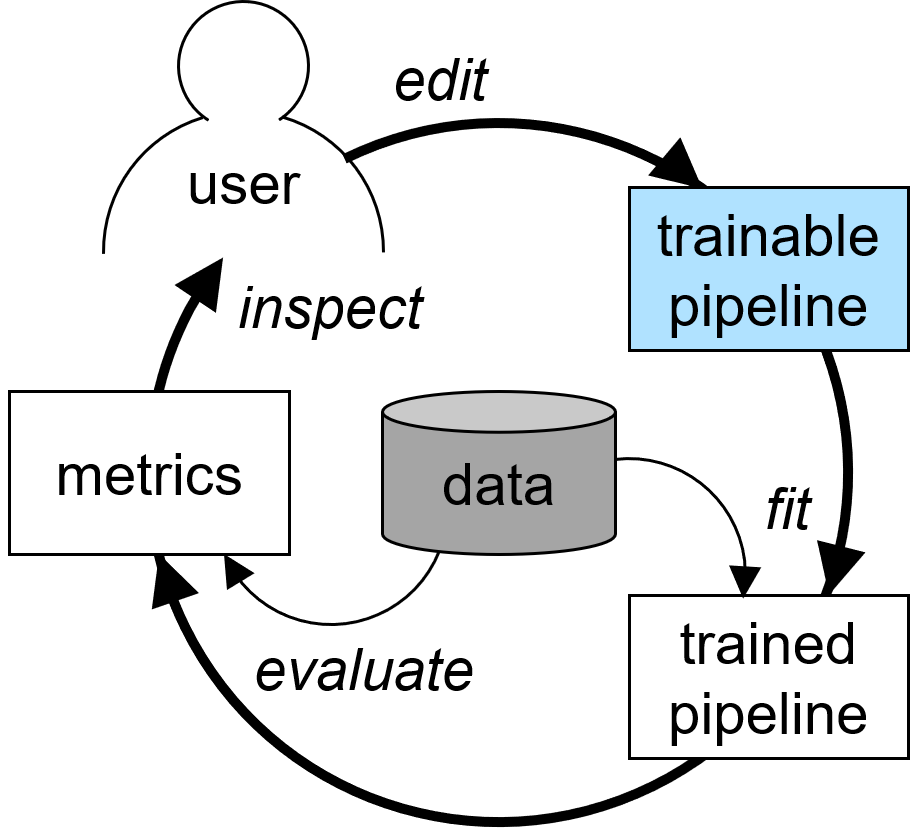

In [1]:
from IPython.display import Image
Image(filename="workflow_manual.png", width=250) 

The center of the picture is the *data*.
For simplicity, the picture does not shown how this is split into a
training, validation, and test set.
The workflow starts with the *user*, who is a data scientist.
Based on their intuition and experience, the user edits a *trainable
pipeline*, which is a graph of operators for data preparation and
machine learning.
That means the user manually chooses specific operators and manually
configures some of their hyperparameters to specific values.
Next, the user fits the trainable pipeline on the data to obtain a
*trained pipeline*.
In a trained pipeline, the coefficients of operators are bound; for
example, a scaler might have learned the minimum and maximum for each
data column, or a regression might have learned a slope and an offset.
After that, the user evaluates the trained pipeline on the data to
measure some *metrics* that indicate how well the pipeline performs.
Finally, the user inspects those metrics, and uses their intuition and
experience to edit the trainable pipeline again.
This process keeps iterating until the user is satisfied with the
metrics and exits the loop with the best found trained pipeline.
Doing these experiments systematically requires rigor from the user.

In contrast to the above picture, *AutoML* automates the loop.
In other words, the user only needs to start it, and then sits back as
the system searches for the best pipeline.

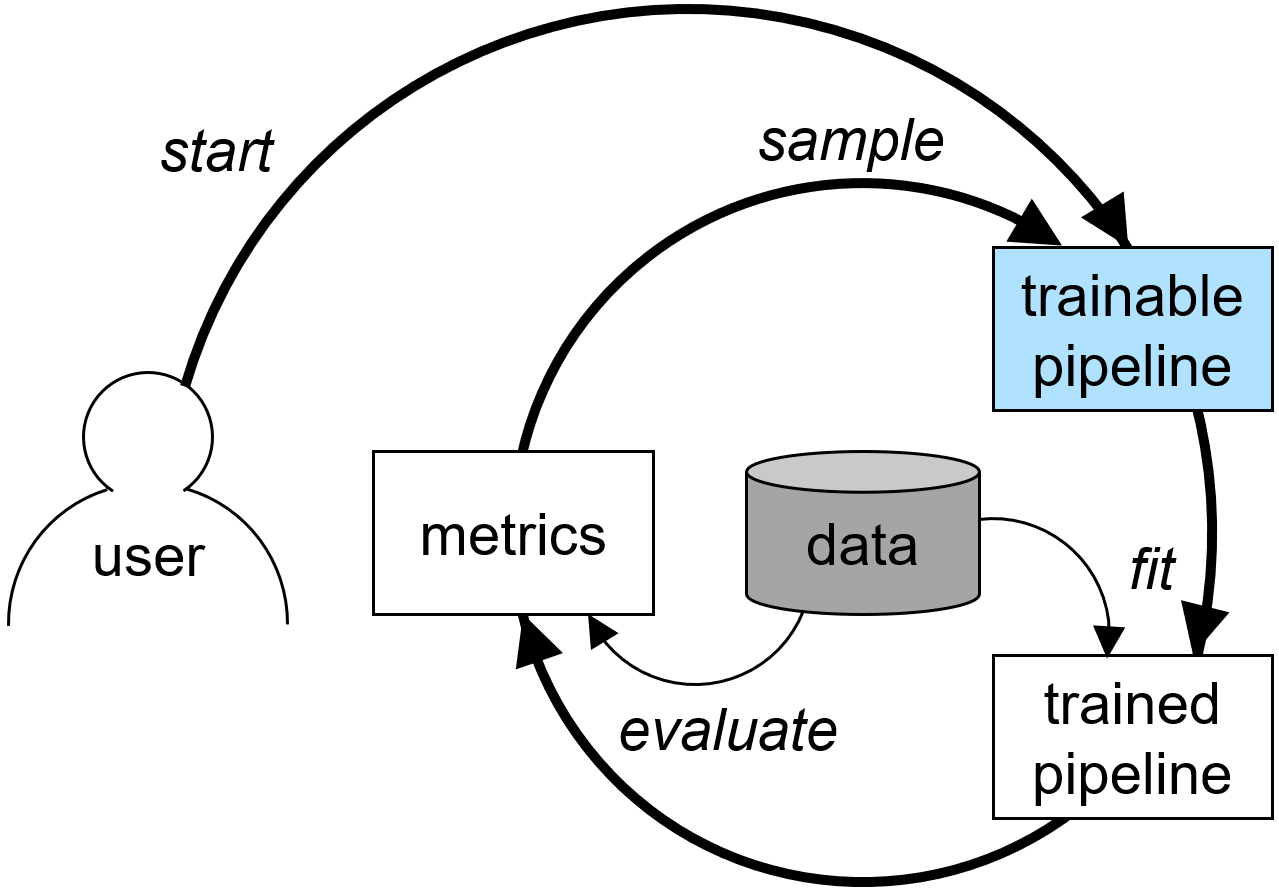

In [2]:
Image(filename="workflow_total.png", width=330)

We refer to the above picture as *total* automation, since the user is
not in the loop.
The AutoML algorithm works by repeatedly sampling a trainable pipeline
and fitting it on data.
Here, sampling might be as simple as grid search or randomized search,
or as sophisticated as Bayesian optimization.
When a termination criterion (e.g., a timeout or a fixed number of
iterations) is reached, the system returns the best pipeline it found
in its search.
Sometimes, total automation succeeds and saves users a lot of effort.
However, it is also possible that users have intuition and experience
that would help the search converge faster or to reach a better
outcome.

Therefore, *gradual AutoML* keeps the inner loop of automated search,
but also adds an outer loop for the user to inspect results and
control the process.

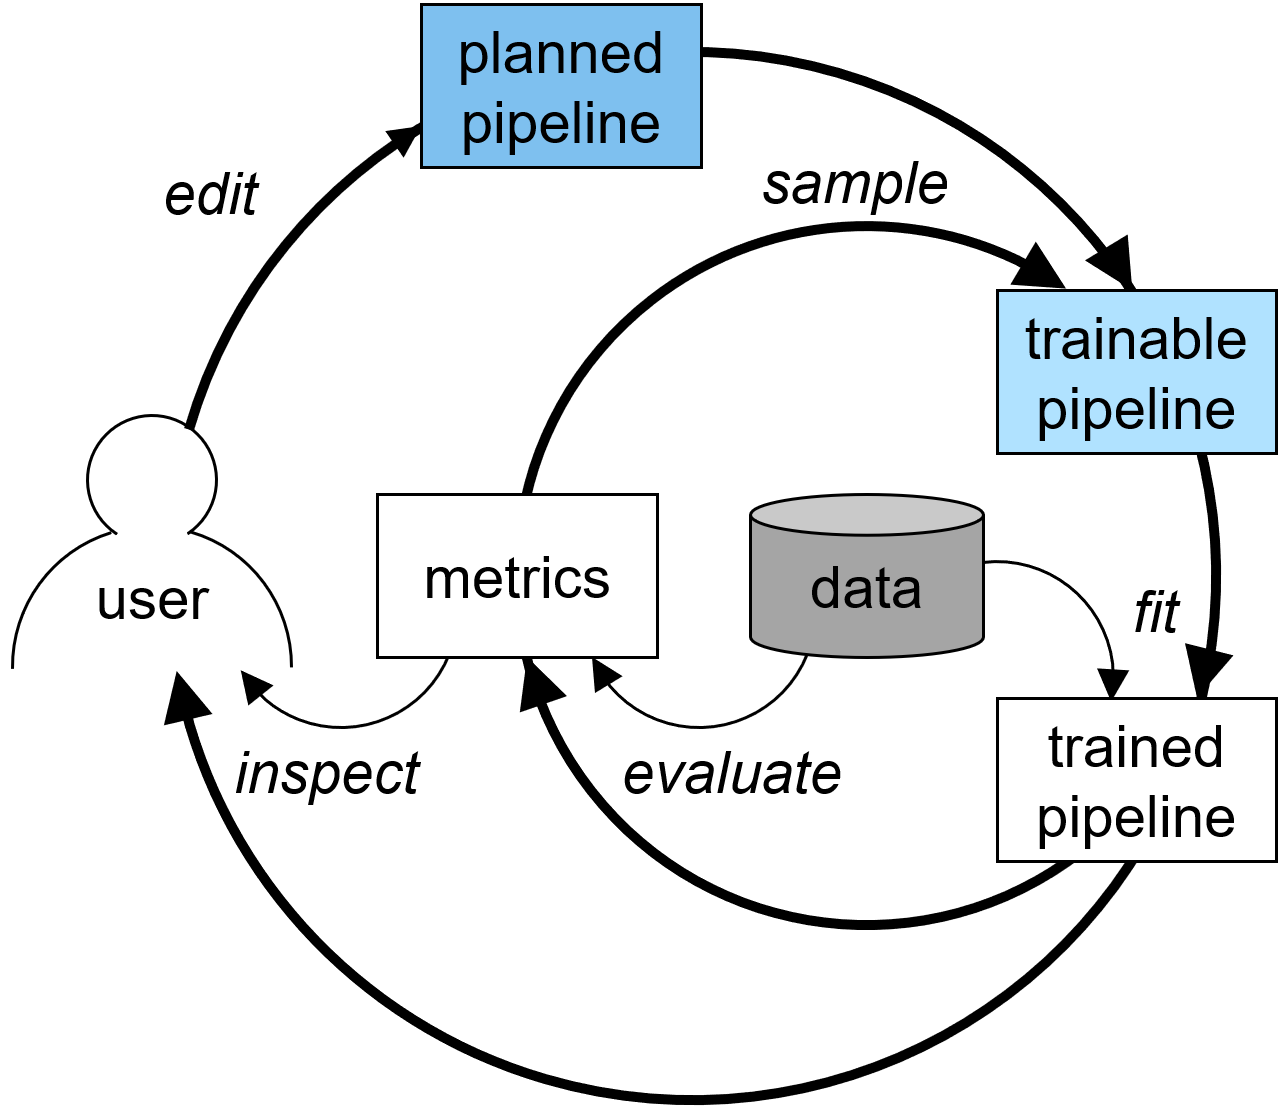

In [3]:
Image(filename="workflow_gradual.png", width=330)

A *planned pipeline* is similar to a trainable pipeline in that it
specifies a graph of machine-learning operators.
But unlike a trainable pipeline, it can under-specify certain choices,
thus leaving them to the automated search to explore.
A planned pipeline can include choices between different operators to
select from, and it can leave hyperparameters free to be tuned.

## 1.2 Tutorial Outline

The tutorial consists of 11 notebooks, each of which should take around
10-15 minutes to explain.
Notebooks 1-3 are a general overview for gradual AutoML and the Lale APIs
for using it.
Notebooks 4-7 cover common machine-learning challenges and how to tackle
them with gradual AutoML.
Notebooks 8-10 discuss more advanced uses of Lale and reveal more of its
inner workings.
Notebook 11 concludes by showcasing some of our ongoing research efforts.

1. [Introduction to AutoML](01_intro.ipynb)
2. [Total Automation with Lale](02_total.ipynb)
3. [Customizing Algorithm Choices and Hyperparameters](03_custom.ipynb)
4. [Handling Class Imbalance](04_imbalance.ipynb)
5. [Bias Mitigation](05_bias.ipynb)
6. [Multi-objective Optimization](07_multiobj.ipynb)
7. [Working with Multi-table Datasets](08_multitab.ipynb)
8. [Adding a New Operator](08_newops.ipynb)
9. [Scikit-learn Compatibility](09_compat.ipynb)
10. [Uses for Schemas](10_schemas.ipynb)
11. [Research Directions](11_directions.ipynb)

## 1.3 Installation

This tutorial is designed to work both lecture-style (for passive
absorption) and hands-on (for actively following along).
If you want the hands-on experience, you need to install Lale.
First, you need a Python environment with Python version 3.7 or up.
One way to accomplish that is by using `virtualenv`, which lets you
create and activate an environment as follows:

```bash
virtualenv -p /usr/bin/python3.7 ~/py_venv_lale_tutorial
source ~/py_venv_lale_tutorial/bin/activate
```

Next, we have prepared an installation target that suffices for most
notebooks in this tutorial.
You can install this Lale installation target as follows:

```bash
pip install "lale[tutorial]"
```

You may also want to install `graphviz` as explained in the
[installation instructions](https://github.com/IBM/lale/blob/master/docs/installation.rst).
The `lale[tutorial]` installation target includes `jupyter`, so you
should be able to run `juypyter notebook` to look at the tutorial.
Open this notebook (`01_intro.ipynb`) and execute the following cells
to check that various packages are ready to use.

In [4]:
import lale
lale.__version__

'0.6.11'

In [5]:
import sklearn
sklearn.__version__

'1.0.2'

In [6]:
import pandas
pandas.__version__

'1.3.5'

In [7]:
import hyperopt
hyperopt.__version__

'0.2.5'

In [8]:
import xgboost
xgboost.__version__

'1.5.1'

In [9]:
import imblearn
imblearn.__version__

'0.9.0'

In [10]:
import aif360
aif360.__version__

'0.3.0'

Some notebooks in this tutorial contain additional installation
instructions.
If you want to just get those out of the way now, you can:
- `pip install torch`
- `pip install torchvision`
- `pip install git+https://github.com/IBM/lale-gpl.git@master`
- `pip install 'Platypus-opt==1.0.4'`.

The following paper has more information about gradual AutoML and Lale.
In the PDF for the paper, you can also find the email addresses of the
authors, in case you want to get in touch with us directly.

```bibtex
@InProceedings{baudart_et_al_2021,
  title = "Pipeline Combinators for Gradual {AutoML}",
  author = "Baudart, Guillaume and Hirzel, Martin and Kate, Kiran and Ram, Parikshit and Shinnar, Avraham and Tsay, Jason",
  booktitle = "Advances in Neural Information Processing Systems (NeurIPS)",
  year = 2021,
  url = "https://proceedings.neurips.cc/paper/2021/file/a3b36cb25e2e0b93b5f334ffb4e4064e-Paper.pdf" }
```